In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [45]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [46]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [47]:
df_UAE=df[df['country']=='UAE']
df_UAE.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
8,9,UAE,Dubai,Farmhouse,Semi-Furnished,5213,3131373,1968,6,2,...,56255,1866416,15,10300,1264957,0.29,8,8,10,1
35,36,UAE,Dubai,Farmhouse,Unfurnished,4152,2488048,1973,2,2,...,68595,1332965,20,10545,1155083,0.14,4,3,3,0
43,44,UAE,Dubai,Apartment,Semi-Furnished,3078,1842820,1989,5,6,...,99700,1339127,30,18475,503693,0.08,4,5,8,0
59,60,UAE,Abu Dhabi,Townhouse,Semi-Furnished,1016,612540,2011,6,5,...,74870,385575,20,6370,226965,0.04,5,6,6,0
65,66,UAE,Dubai,Farmhouse,Semi-Furnished,2132,1281503,1960,4,1,...,72575,624719,20,18655,656784,0.06,7,5,7,1


#### We will remove irrelevant variables and avoid model cheating.

In [48]:
df_UAE = df_UAE.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [49]:
df_UAE.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
8,UAE,Farmhouse,Semi-Furnished,5213,3131373,1968,2,1,0,0
35,UAE,Farmhouse,Unfurnished,4152,2488048,1973,2,1,0,1
43,UAE,Apartment,Semi-Furnished,3078,1842820,1989,6,6,0,0
59,UAE,Townhouse,Semi-Furnished,1016,612540,2011,5,3,0,0
65,UAE,Farmhouse,Semi-Furnished,2132,1281503,1960,1,1,1,1


In [50]:
df_UAE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15141 entries, 8 to 199971
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15141 non-null  object
 1   property_type       15141 non-null  object
 2   furnishing_status   15141 non-null  object
 3   property_size_sqft  15141 non-null  int64 
 4   price               15141 non-null  int64 
 5   constructed_year    15141 non-null  int64 
 6   rooms               15141 non-null  int64 
 7   bathrooms           15141 non-null  int64 
 8   garage              15141 non-null  int64 
 9   garden              15141 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [51]:
df_UAE.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15141.000000,1.514100e+04,15141.000000,15141.000000,15141.000000,15141.000000,15141.000000
mean,3178.916254,1.907340e+06,1991.635427,4.541972,2.791097,0.496533,0.500760
std,1618.850655,9.713311e+05,18.466224,2.306166,1.862057,0.500004,0.500016
min,400.000000,2.370710e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1760.000000,1.055664e+06,1976.000000,3.000000,1.000000,0.000000,0.000000
50%,3168.000000,1.901821e+06,1992.000000,5.000000,2.000000,0.000000,1.000000
75%,4581.000000,2.748321e+06,2008.000000,7.000000,4.000000,1.000000,1.000000
max,6000.000000,3.603554e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [52]:
df_UAE.shape

(15141, 10)

In [53]:
df_UAE.value_counts()

country  property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
UAE      Apartment      Fully-Furnished    401                 245094   2022              2      2          1       1         1
         Studio         Unfurnished        5678                3403568  1977              1      1          1       0         1
                                           5610                3370388  1984              5      2          1       0         1
                                           5614                3366498  2001              2      1          1       1         1
                                           5641                3384072  2019              8      1          1       1         1
                                                                                                                             ..
         Farmhouse      Unfurnished        5740                3446104  1964              6      6          0

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999996         -0.004935  0.002811   
price                         0.999996  1.000000         -0.004947  0.002822   
constructed_year             -0.004935 -0.004947          1.000000 -0.000523   
rooms                         0.002811  0.002822         -0.000523  1.000000   
bathrooms                     0.010412  0.010449          0.002172  0.625681   
garage                        0.001191  0.001229         -0.008242 -0.006848   
garden                        0.005445  0.005434          0.000381 -0.010381   

                    bathrooms    garage    garden  
property_size_sqft   0.010412  0.001191  0.005445  
price                0.010449  0.001229  0.005434  
constructed_year     0.002172 -0.008242  0.000381  
rooms                0.625681 -0.006848 -0.010381  
bathrooms            1.000000 -0.010887  0.011698  
garage              -0.010887  1.000000 -0.0089

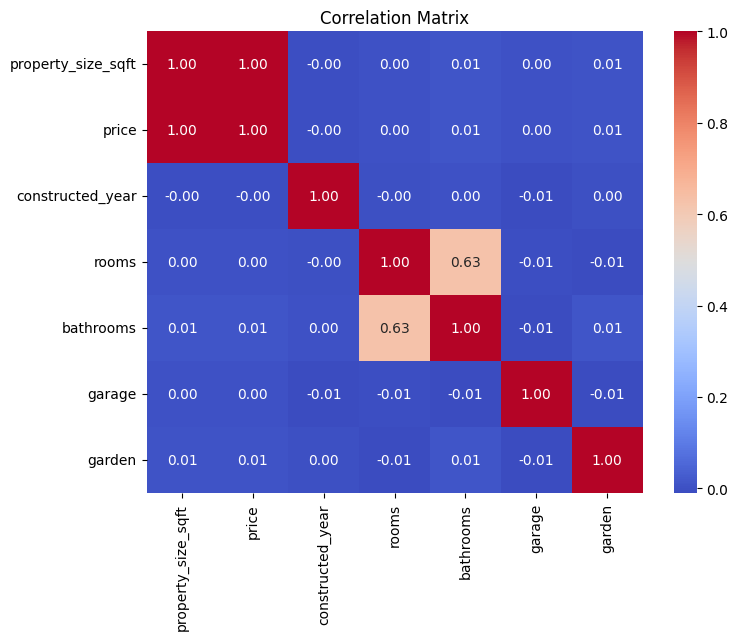

In [54]:
correlation_matrix = df_UAE.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [55]:
df_UAE = pd.get_dummies(df_UAE, columns=['property_type', 'furnishing_status'])
df_UAE.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
8,UAE,5213,3131373,1968,2,1,0,0,False,True,False,False,False,False,False,True,False
35,UAE,4152,2488048,1973,2,1,0,1,False,True,False,False,False,False,False,False,True
43,UAE,3078,1842820,1989,6,6,0,0,True,False,False,False,False,False,False,True,False
59,UAE,1016,612540,2011,5,3,0,0,False,False,False,False,True,False,False,True,False
65,UAE,2132,1281503,1960,1,1,1,1,False,True,False,False,False,False,False,True,False


In [56]:
df_UAE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15141 entries, 8 to 199971
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15141 non-null  object
 1   property_size_sqft                 15141 non-null  int64 
 2   price                              15141 non-null  int64 
 3   constructed_year                   15141 non-null  int64 
 4   rooms                              15141 non-null  int64 
 5   bathrooms                          15141 non-null  int64 
 6   garage                             15141 non-null  int64 
 7   garden                             15141 non-null  int64 
 8   property_type_Apartment            15141 non-null  bool  
 9   property_type_Farmhouse            15141 non-null  bool  
 10  property_type_Independent House    15141 non-null  bool  
 11  property_type_Studio               15141 non-null  bool  
 12  property

In [57]:
X = df_UAE.drop(['price', 'country'], axis=1)
y = df_UAE['price']

In [58]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [59]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999910174415714
Linier Regresion RMSE :  2896.579267507297


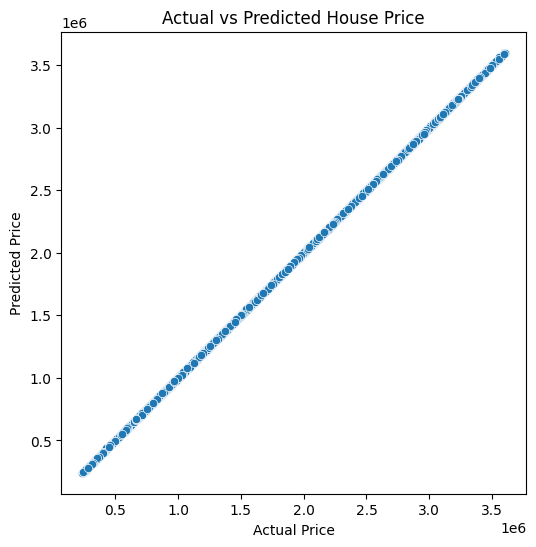

In [60]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [61]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9999794424671142
Decision Tree RMSE :  4381.985027119566


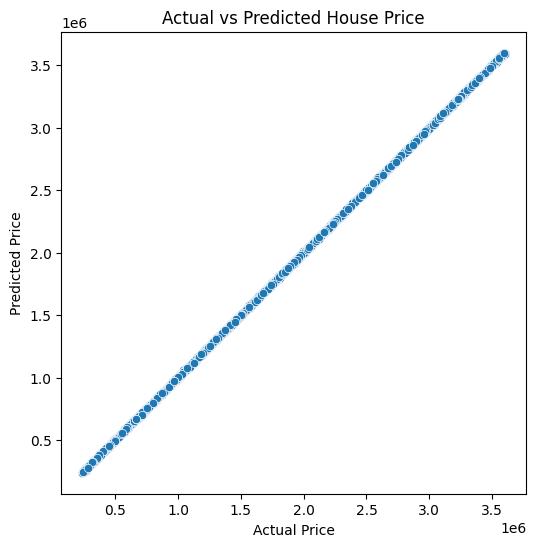

In [62]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [63]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9999886956631444
Random Forest RMSE :  4381.985027119566


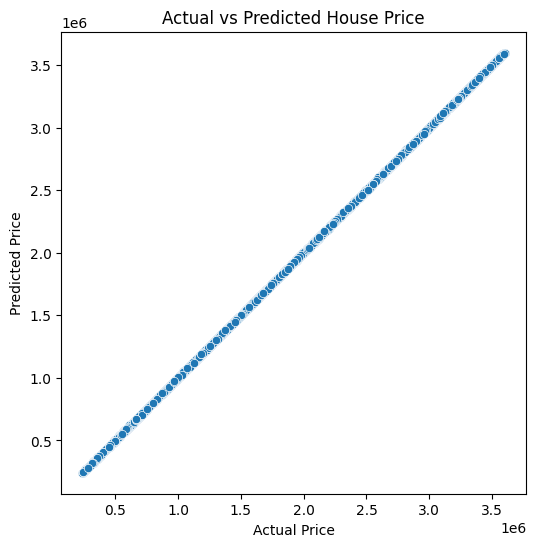

In [64]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [65]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9999413638392264
Gradient Boost RMSE :  4381.985027119566


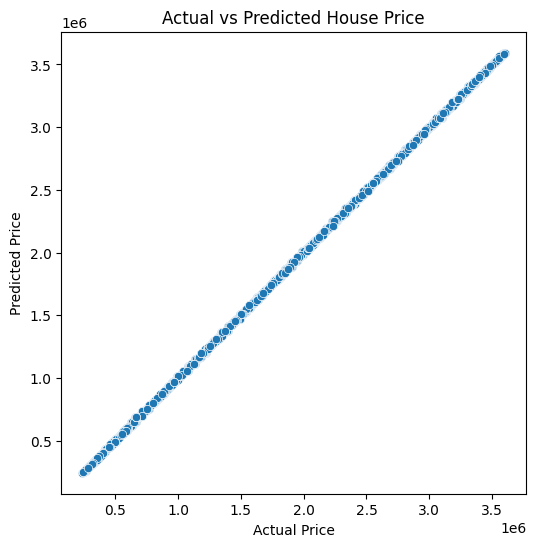

In [66]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [67]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [68]:
result

,metode,R²,RMSE
0,lr,0.999991,2896.579268
1,dt,0.999979,4381.985027
2,rf,0.999989,3249.435626
3,gb,0.999941,7400.620867
